In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from tools.utils import *

%matplotlib inline
import matplotlib.pyplot as plt

from time import time
from datasets.carla import CarlaDataset
from datasets.nuscenes import NuScenesDataset
from datasets.nuscenes import get_nusc

In [ ]:
nusc, dataroot = get_nusc("mini", "../../data/nuscenes")
val_data = NuScenesDatasetAugmented(nusc, False)

In [6]:
carla_data = CarlaDataset("../../data/carla/val_aug", False)

In [25]:
t_0 = time() 
images, intrinsics, extrinsics, labels, oods = carla_data[9998]
time() - t_0

0.04032468795776367

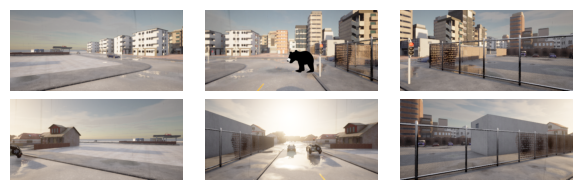

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(6, 2))

for i, ax in enumerate(axes.flatten()):
    ax.axis('off')
    ax.imshow(images[i].permute(1, 2, 0).numpy())
    
plt.tight_layout()

(-0.5, 199.5, 199.5, -0.5)

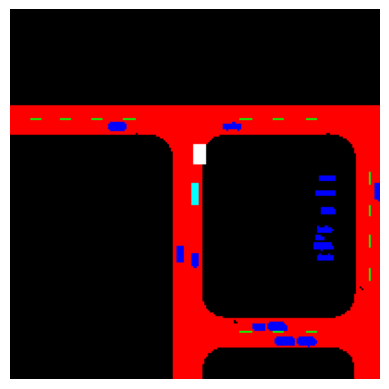

In [27]:
l_image = map_rgb(labels, ego=True) / 255
l_image[oods == 1, :] = 1
plt.imshow(l_image)
plt.axis("off")